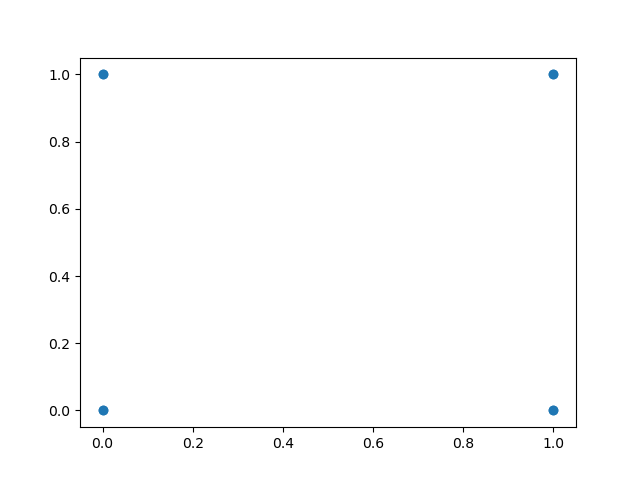

In [37]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import mpl_interactions.ipyplot as iplt

T = np.array([[1, 0, 0], [0, 1, 0], [1,1,1]])

projected_points = {
    "x": [],
    "y": [],
    "t": []
}

def fx(N1, N2, N3, T):
    if T == "OS":
        T = np.array([[1, 0, 0], [0, 1, 0], [1,1,1]]) # OS
    elif T == "RS": 
        T = np.array([[1, 0,  0],[0,  0, -1],[1,  1, 1]]) #RS
    elif T=="CS":
        T = np.array([[0, 0,  1],[1,  0, 0],[1,  1, 1]])
    elif T == "NLR":
        T = np.array([[-1,  1,  0],[ 0, -1,  1],[ 1,  1,  1]])
    for key in projected_points.keys():
        projected_points[key] = []
    
    for i in range(N1):
        for j in range(N2):
            for k in range(N3):
                nu = T @ np.array([i, j, k])
                projected_points["x"].append( nu[0] )
                projected_points["y"].append( nu[1] )
                projected_points["t"].append( nu[2] )
    return projected_points["x"]

def fy(x, N1, N2, N3, T):
    return projected_points["y"]

N1 = np.arange(2, 33, dtype=np.int8)
N2 = np.arange(2, 33, dtype=np.int8)
N3 = np.arange(2, 161, dtype=np.int16)
# T = np.arange(0, 4, dtype=np.int8)
T = {("OS", "RS", "CS", "NLR")}

plt.figure()
iplt.scatter(fx, fy, N1=N1, N2=N2, N3=N3, T=T)
plt.show()

In [ ]:
def fx(N1, N2, N3):
    for key in projected_points.keys():
        projected_points[key] = []
    
    for i in range(N1):
        for j in range(N2):
            for k in range(N3):
                nu = T @ np.array([i, j, k])
                projected_points["x"].append( nu[0] )
                projected_points["y"].append( nu[1] )
                projected_points["t"].append( nu[2] )
    return projected_points["x"]

def fy(x, N1, N2, N3):
    return projected_points["y"]

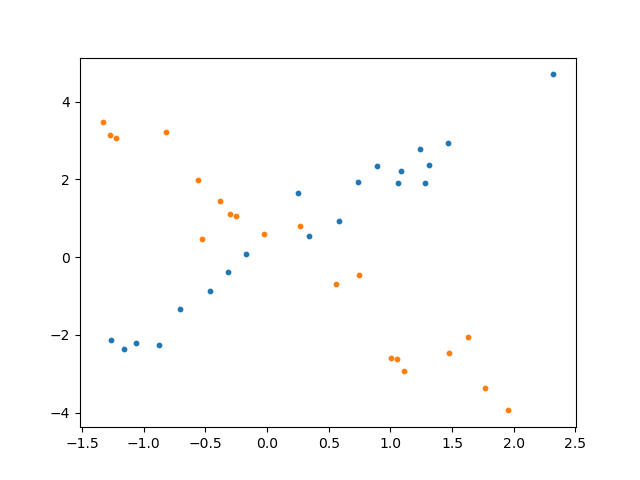

In [30]:
x = np.random.randn(20)
y = 2 * x + np.random.randn(20) / 2

x2 = np.random.randn(20)
y2 = -2 * x2 - np.random.randn(20) / 2


fig, ax = plt.subplots()
ctrls = iplt.scatter(x, y, s=(10, 1000))
_ = iplt.scatter(x2, y2, s=ctrls["s"])

In [20]:
plt.close()

In [18]:
np.arange(1, 10, dtype=np.int8)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

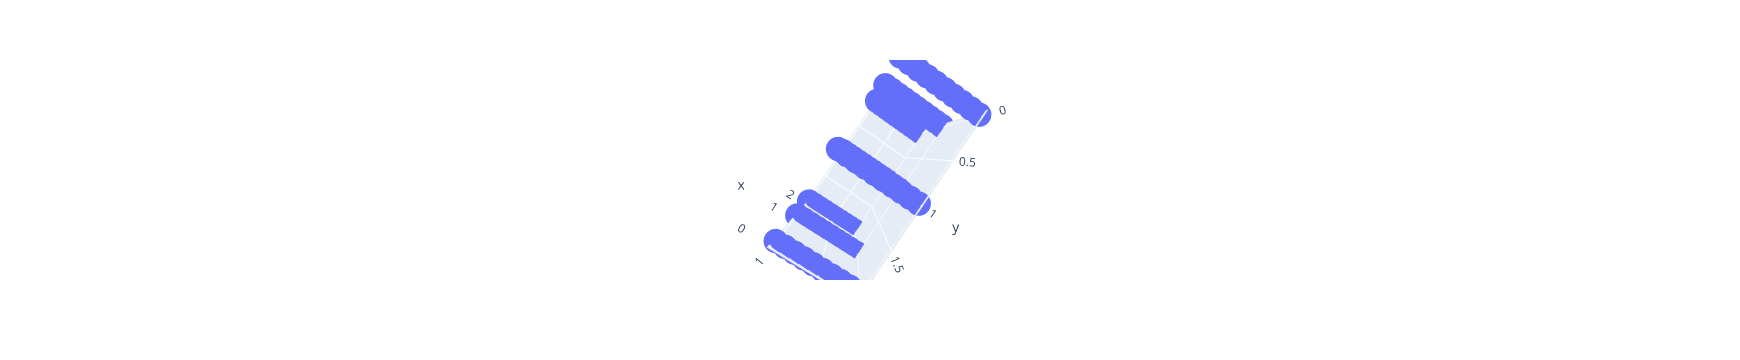

In [19]:
elem_dict = {}
elem_count = []
for el in zip(x, y):
    if el not in elem_dict:
        elem_dict[el] = .1
        elem_count.append(.1)
    else:
        elem_dict[el] += .1
        elem_count.append( elem_dict[el] )
px.scatter_3d(x=x, y=y, z=elem_count)

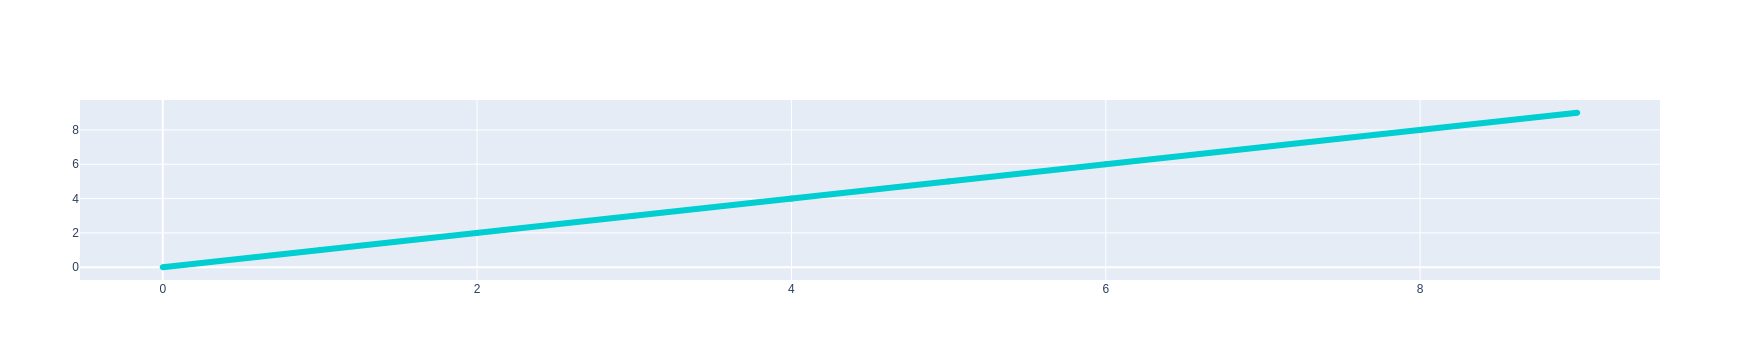

In [43]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
for step in np.arange(0, 20, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name=f"v = {step}",
            x = np.arange(0, 10, 1)
        )
    )

fig.data[10].visible = True



fig.show()

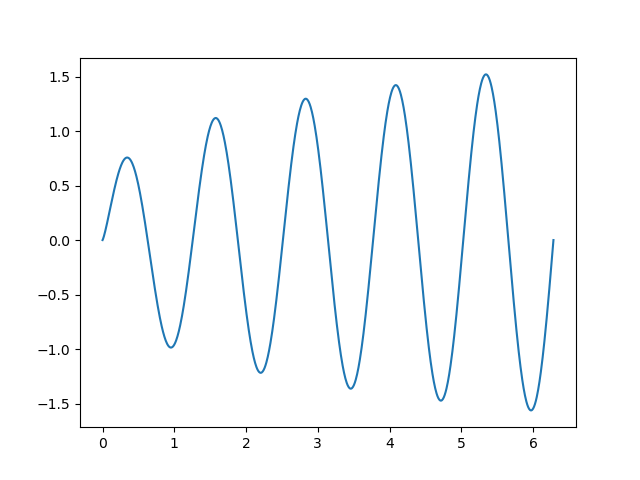

In [40]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

import mpl_interactions.ipyplot as iplt

def f(x, tau, beta):
    return np.sin(x*tau) * x**beta

x = np.linspace(0, 2 * np.pi, 1000)
tau = np.linspace(5, 10)
beta = np.linspace(0.25, 1)

fig, ax = plt.subplots()
controls = iplt.plot(x, f, tau=tau, beta=beta)

In [54]:
import sys
sys.path.append("../src")
import flauers
from importlib import reload
reload(flauers)

<module 'flauers' from '/home/spappalardo@inl34.ec-lyon.fr/Documents/systolic_injector/Visualization/../src/flauers/__init__.py'>

In [57]:
sa = flauers.SystolicArray(10, 10, 10, flauers.projection_matrices.output_stationary)
pes = np.array(sa.space_projection())
pes

array([[ 1,  1,  3],
       [ 1,  1,  4],
       [ 1,  1,  5],
       ...,
       [ 9,  9, 25],
       [ 9,  9, 26],
       [ 9,  9, 27]])

In [63]:
pes.shape

(729, 3)